In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import json

In [3]:
import pandas as pd
import json

# Specify the path to your JSON file
json_file_path = "/content/drive/MyDrive/fitfiles/customer_data/customer.json"

# Load JSON data as a list of dictionaries
with open(json_file_path, 'r') as f:
    json_data = json.load(f)



In [4]:
# Normalize JSON data and construct DataFrame
if isinstance(json_data, list):
    # If json_data is a list of dictionaries
    df = pd.json_normalize(json_data)
elif isinstance(json_data, dict):
    # If json_data is a single dictionary
    df = pd.json_normalize([json_data])
else:
    raise ValueError("Unexpected JSON format")

# Display the DataFrame
print(df.head())

     id firstName middleName        lastName           fullName namePrefix  \
0  None       Sai       None  Srujana Gunda   Sai Srujana Gunda       None   

  nameSuffix gender displayName               username  ... loginInfo  \
0       None   None        None  GSAISRUJANA@GMAIL.COM  ...      None   

  primaryEmailAddress.emailAddress primaryEmailAddress.type  \
0            gsaisrujana@gmail.com                     None   

  primaryEmailAddress.primary  primaryEmailAddress.emailVerified  \
0                        True                               True   

   primaryEmailAddress.emailVerificationTimestamp  \
0                            2023-11-08T14:41:32Z   

  primaryEmailAddress.emailAddressId customerLocation.countryCode  \
0                               None                           IN   

  customerLocation.verified customerLocation.verifiedTimestamp  
0                      True               2021-12-20T08:34:30Z  

[1 rows x 38 columns]


In [7]:
!pip install fitparse

import fitparse
import pandas as pd
import glob
import os

# Path where the .fit files are unzipped
unzip_folder_path = "/content/fitfiles"

# Get the list of all .fit files
fit_files = glob.glob(os.path.join(unzip_folder_path, "*.fit"))

# Initialize an empty DataFrame
combined_df = pd.DataFrame()

# Function to process a single .fit file
def process_fit_file(file_path):
    fitfile = fitparse.FitFile(file_path)

    records = []
    for record in fitfile.get_messages('record'):
        record_data = {}
        for data in record:
            record_data[data.name] = data.value
        records.append(record_data)

    return pd.DataFrame(records)

# Process each .fit file and append the data to combined_df
for fit_file in fit_files:
    print(f"Processing file: {fit_file}")
    df = process_fit_file(fit_file)
    combined_df = pd.concat([combined_df, df], ignore_index=True)

# Save the combined DataFrame as a single CSV file
combined_csv_path = "/content/drive/MyDrive/fitfiles/combined_fit_data.csv"
combined_df.to_csv(combined_csv_path, index=False)

# Display the combined DataFrame
print(combined_df.head())
print(combined_df.info())


Streaming output truncated to the last 5000 lines.
Processing file: /content/fitfiles/gsaisrujana@gmail.com_143631421109.fit
Processing file: /content/fitfiles/gsaisrujana@gmail.com_193768710139.fit
Processing file: /content/fitfiles/gsaisrujana@gmail.com_122328122910.fit
Processing file: /content/fitfiles/gsaisrujana@gmail.com_199680572917.fit
Processing file: /content/fitfiles/gsaisrujana@gmail.com_162102004828.fit
Processing file: /content/fitfiles/gsaisrujana@gmail.com_155779819595.fit
Processing file: /content/fitfiles/gsaisrujana@gmail.com_185062979269.fit
Processing file: /content/fitfiles/gsaisrujana@gmail.com_146285812318.fit
Processing file: /content/fitfiles/gsaisrujana@gmail.com_225051869325.fit
Processing file: /content/fitfiles/gsaisrujana@gmail.com_126355479052.fit
Processing file: /content/fitfiles/gsaisrujana@gmail.com_132624967182.fit
Processing file: /content/fitfiles/gsaisrujana@gmail.com_136566465597.fit
Processing file: /content/fitfiles/gsaisrujana@gmail.com_1581

            distance     heart_rate                      timestamp  \
count  804630.000000  830230.000000                         830246   
mean       14.078476     125.778688  2022-11-10 04:06:07.391318784   
min         0.000000      43.000000            2021-12-21 02:18:59   
25%         0.000000     110.000000  2022-04-26 02:07:58.249999872   
50%         0.000000     125.000000     2022-10-14 01:47:38.500000   
75%         0.000000     143.000000  2023-04-12 12:44:08.750000128   
max      4752.290000     204.000000            2024-02-01 14:27:31   
std       147.068037      23.112814                            NaN   

         unknown_135    unknown_136   unknown_116   unknown_108  \
count  830230.000000  830230.000000  25391.000000  25406.000000   
mean      101.031067     125.778681   6395.100626   1416.973746   
min         0.000000      43.000000    100.000000    308.000000   
25%        32.000000     110.000000   4200.000000    623.000000   
50%       108.000000     125.00000

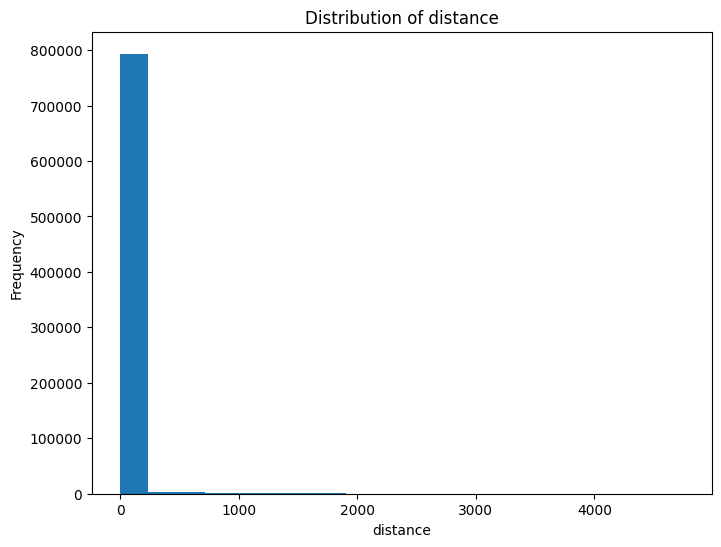

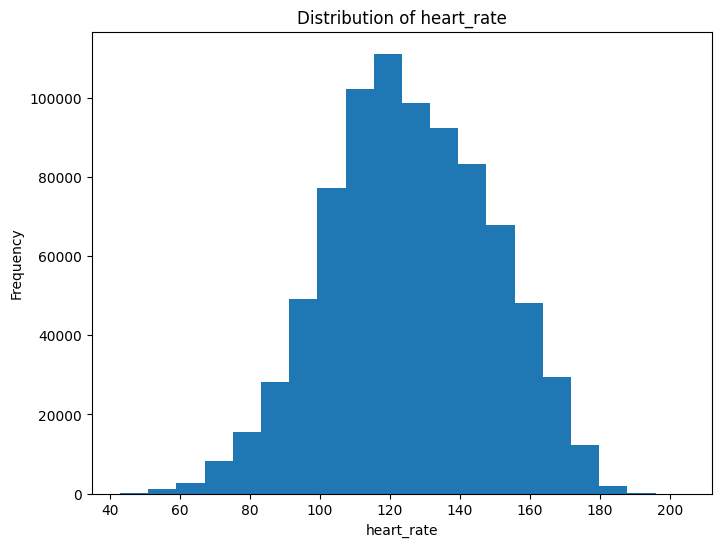

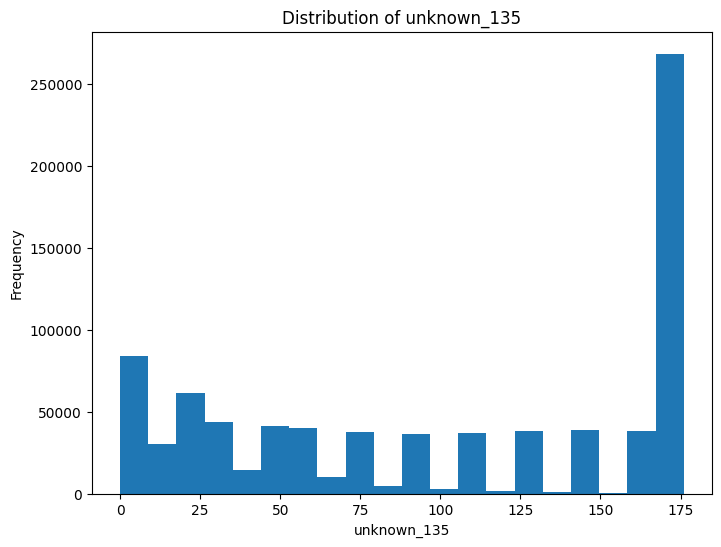

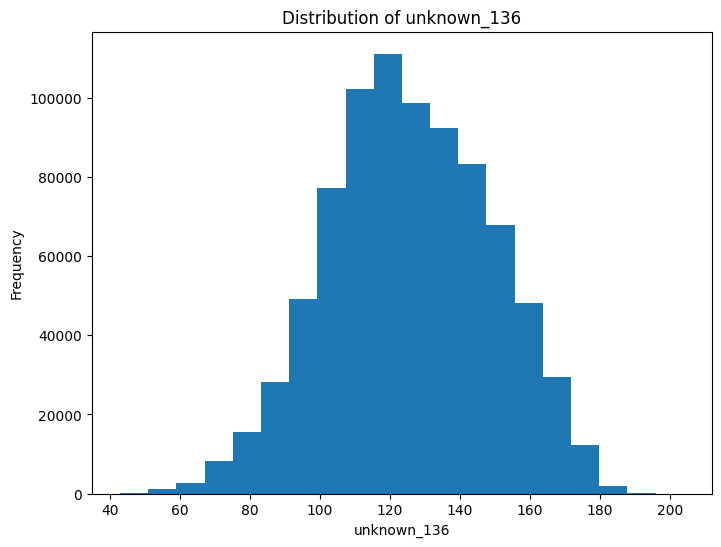

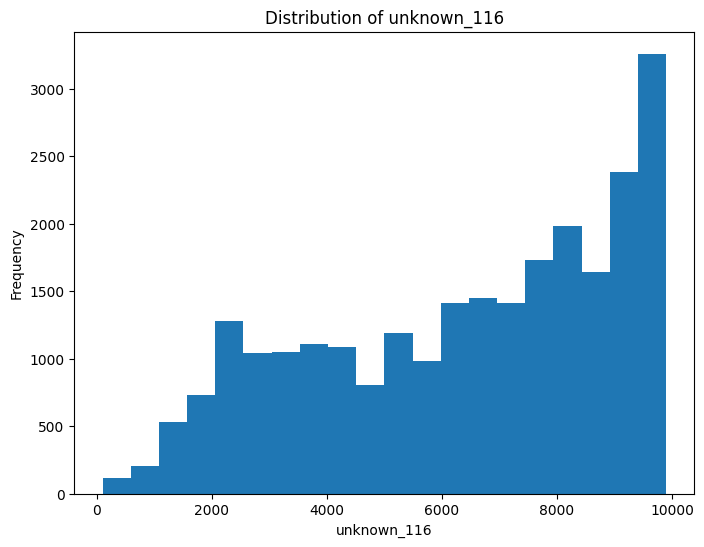

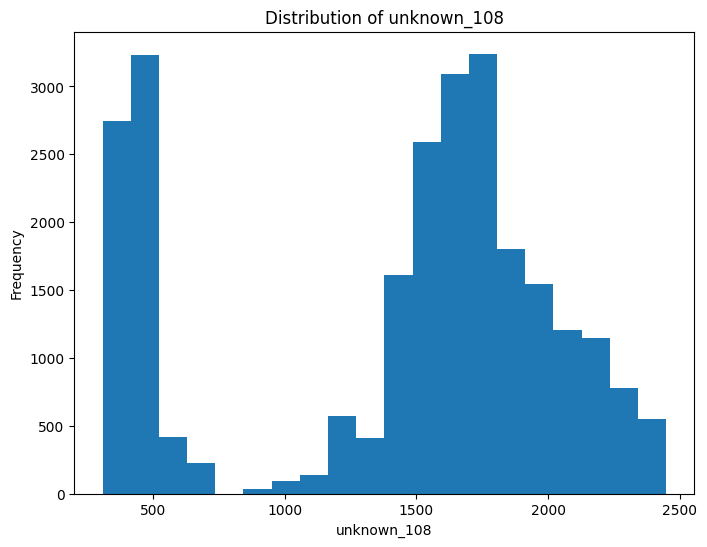

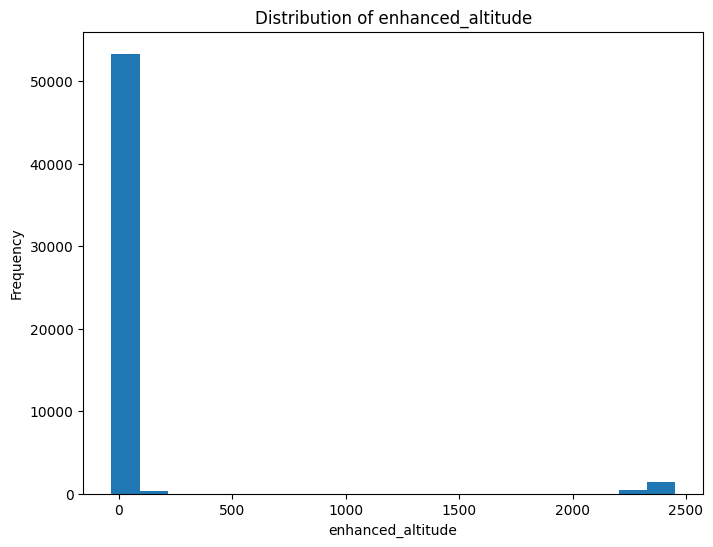

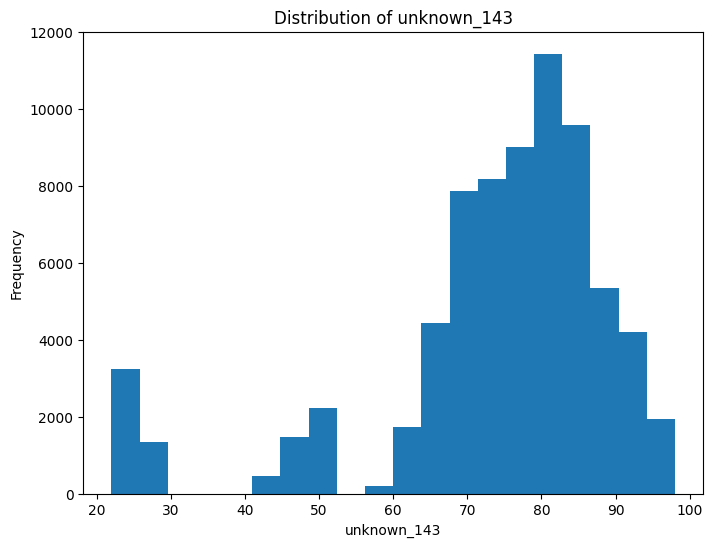

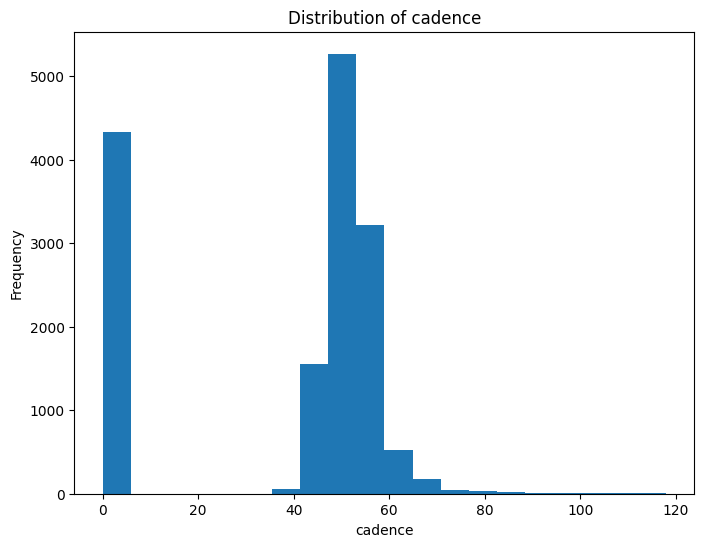

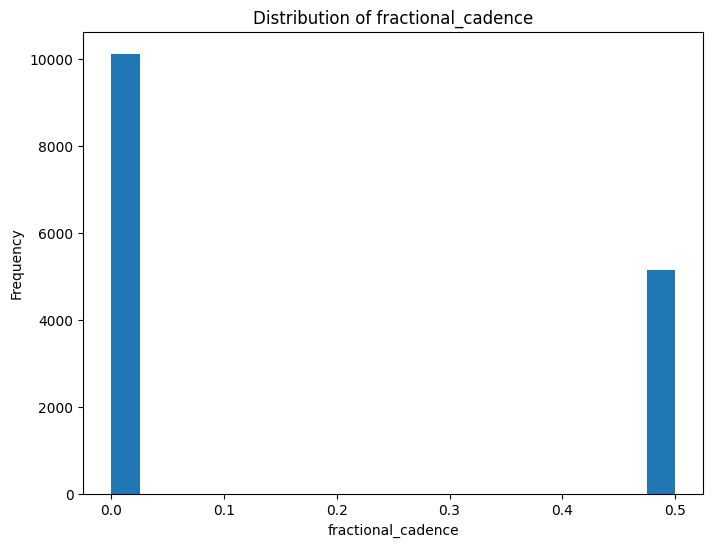

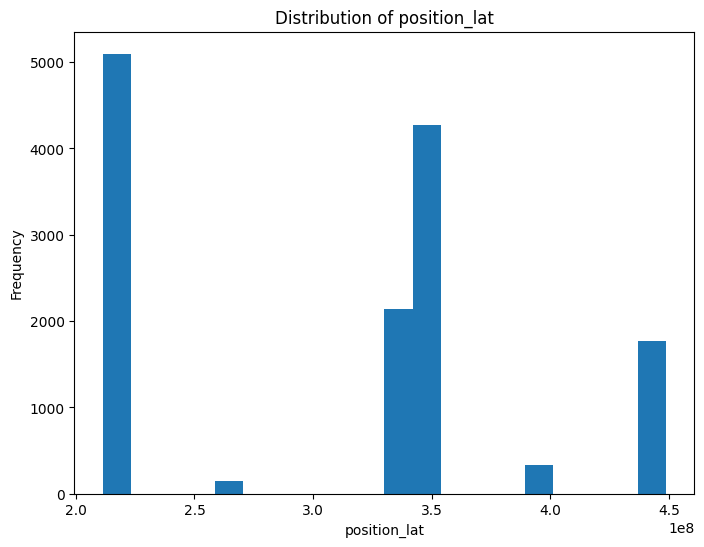

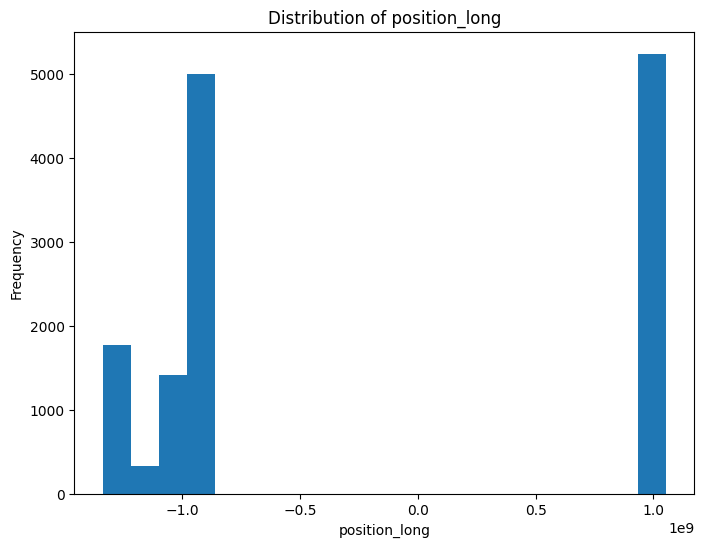

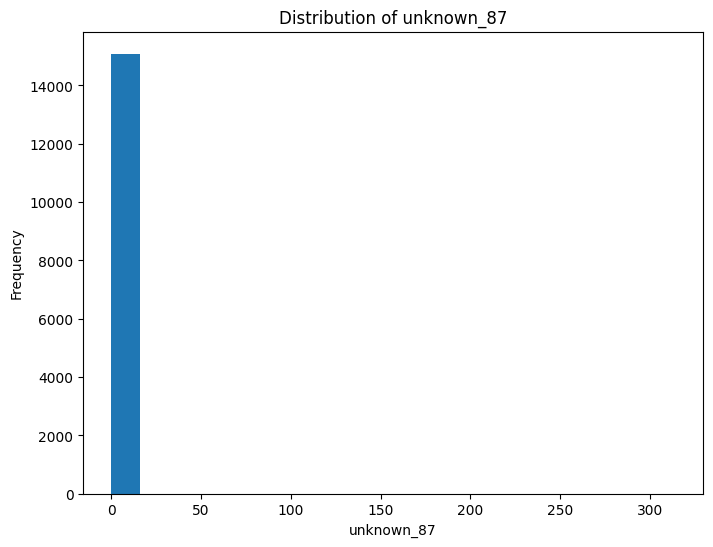

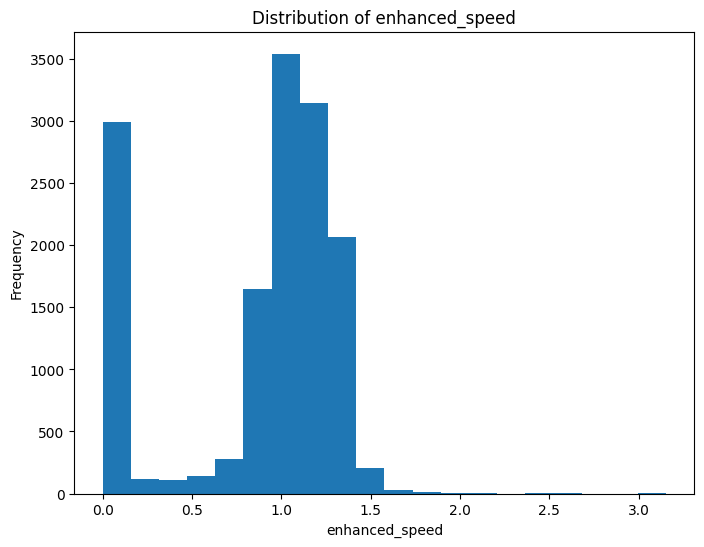

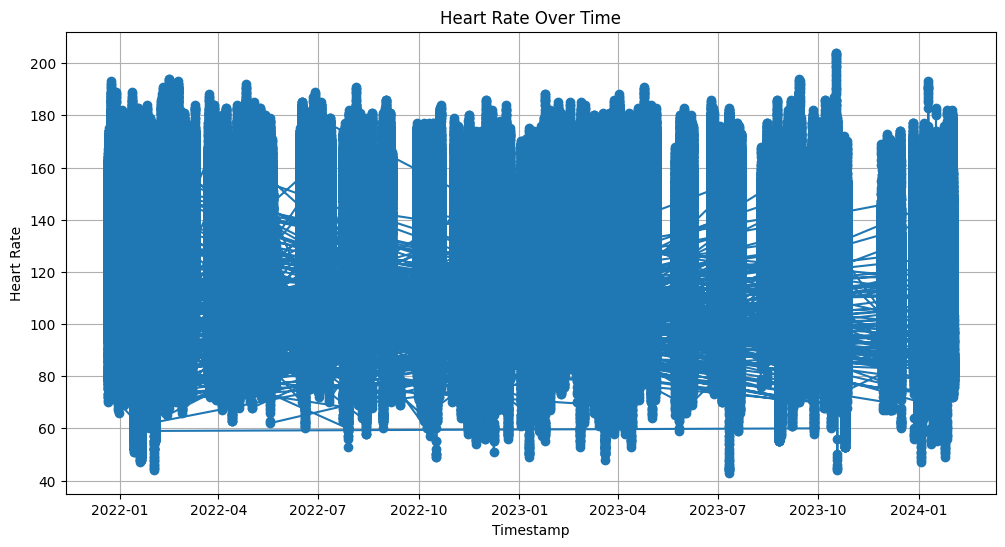

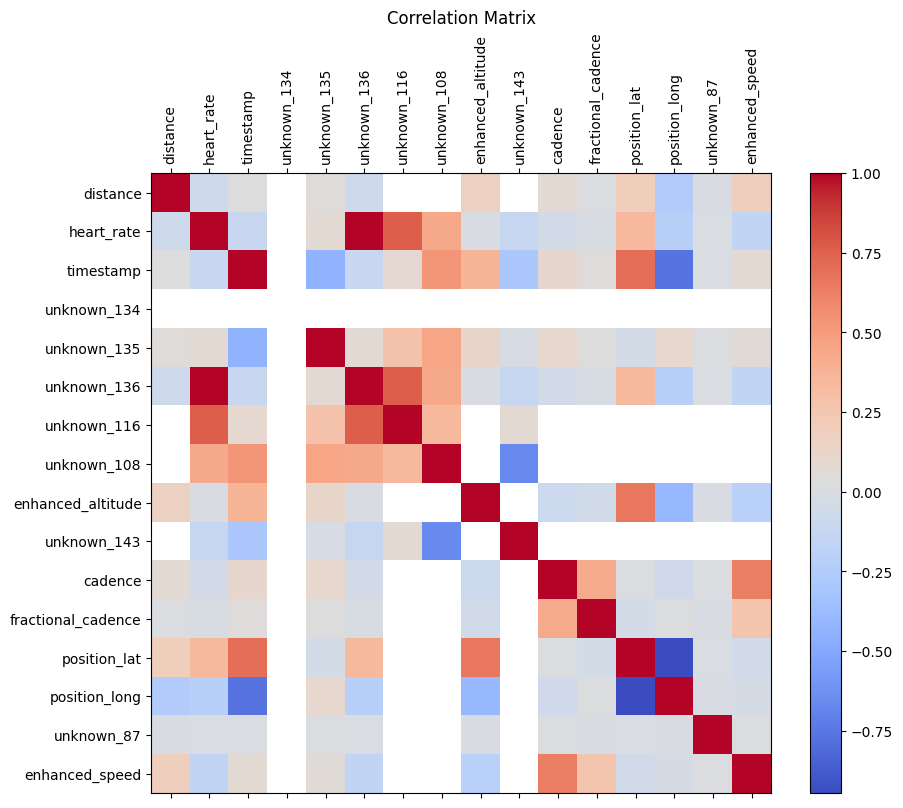

Average Heart Rate: 125.77868783349193
Maximum Heart Rate: 204.0
Minimum Heart Rate: 43.0


In [8]:
import matplotlib.pyplot as plt

# 1. Summary Statistics
summary_stats = combined_df.describe()
print(summary_stats)

# 2. Distribution of Numeric Variables
numeric_cols = combined_df.select_dtypes(include=['float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    combined_df[col].plot(kind='hist', bins=20, title=f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Time Series Analysis
plt.figure(figsize=(12, 6))
plt.plot(combined_df['timestamp'], combined_df['heart_rate'], marker='o', linestyle='-')
plt.title('Heart Rate Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Heart Rate')
plt.grid(True)
plt.show()

# Correlation Analysis
correlation_matrix = combined_df.corr()
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.title('Correlation Matrix')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

# Heart Rate Analysis (e.g., average heart rate)
avg_heart_rate = combined_df['heart_rate'].mean()
max_heart_rate = combined_df['heart_rate'].max()
min_heart_rate = combined_df['heart_rate'].min()
print(f"Average Heart Rate: {avg_heart_rate}")
print(f"Maximum Heart Rate: {max_heart_rate}")
print(f"Minimum Heart Rate: {min_heart_rate}")
